# Multiple Linear Regression

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
df = pd.read_csv("C://Users//Manisha Chandanshiv//OneDrive//Desktop//ToyotaCorolla - MLR.csv")  # Replace with your actual file path
print(df.info())
print(df.describe())
print(df.isnull().sum())  # Check for missing values


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1436 entries, 0 to 1435
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Price      1436 non-null   int64 
 1   Age_08_04  1436 non-null   int64 
 2   KM         1436 non-null   int64 
 3   Fuel_Type  1436 non-null   object
 4   HP         1436 non-null   int64 
 5   Automatic  1436 non-null   int64 
 6   cc         1436 non-null   int64 
 7   Doors      1436 non-null   int64 
 8   Cylinders  1436 non-null   int64 
 9   Gears      1436 non-null   int64 
 10  Weight     1436 non-null   int64 
dtypes: int64(10), object(1)
memory usage: 123.5+ KB
None
              Price    Age_08_04             KM           HP    Automatic  \
count   1436.000000  1436.000000    1436.000000  1436.000000  1436.000000   
mean   10730.824513    55.947075   68533.259749   101.502089     0.055710   
std     3626.964585    18.599988   37506.448872    14.981080     0.229441   
min     4350.000000 

C:\Users\Manisha Chandanshiv\AppData\Local\Temp\ipykernel_31312\2205997685.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = df.corr()
C:\Users\Manisha Chandanshiv\anaconda3\Lib\site-packages\seaborn\matrix.py:260: FutureWarning: Format strings passed to MaskedConstant are ignored, but in future may error or produce different behavior
  annotation = ("{:" + self.fmt + "}").format(val)


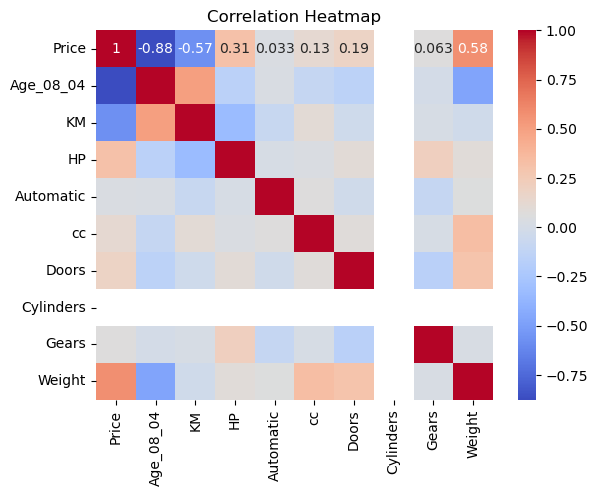

In [4]:
#Correlation Heatmap
corr_matrix = df.corr()
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

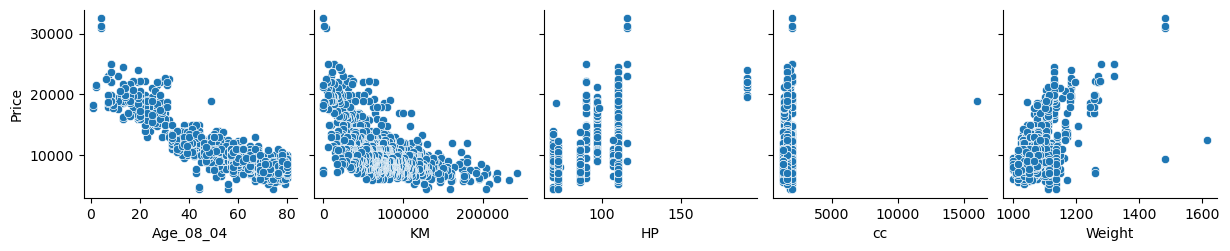

In [7]:
#Pair plot for numerical features
sns.pairplot(df, x_vars=["Age_08_04", "KM", "HP", "cc", "Weight"], y_vars=["Price"], kind="scatter")
plt.show()

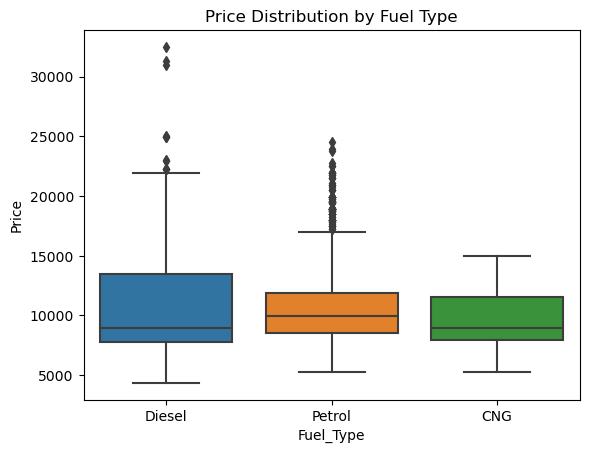

In [9]:
#Distribution of categorical variables
sns.boxplot(data=df, x="Fuel_Type", y="Price")
plt.title("Price Distribution by Fuel Type")
plt.show()

# 2. Preprocessing

In [13]:
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler

# Encode 'FuelType'
df_encoded = pd.get_dummies(df, columns=["Fuel_Type"], drop_first=True)

# Normalize numerical features
scaler = MinMaxScaler()
numerical_features = ["Age_08_04", "KM", "HP", "cc", "Weight"]
df_encoded[numerical_features] = scaler.fit_transform(df_encoded[numerical_features])


# 3. Split the Dataset

In [14]:
X = df_encoded.drop(columns=["Price"])  # Independent variables
y = df_encoded["Price"]  # Dependent variable


In [15]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# 4. Build Multiple Linear Regression Models

In [17]:
# Fit the model
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, y_train)

print("Model Coefficients:", model.coef_)
print("Model Intercept:", model.intercept_)


Model Coefficients: [-9.54560620e+03 -3.94421655e+03  1.72685589e+03  1.48830927e+02
 -4.46471261e+02 -6.03109744e+01  7.73070497e-12  5.51600710e+02
  1.59192494e+04 -6.85487568e+01  1.37080891e+03]
Model Intercept: 12437.965812251801


In [18]:
from sklearn.metrics import mean_squared_error, r2_score

y_pred = model.predict(X_test)
print("Mean Squared Error:", mean_squared_error(y_test, y_pred))
print("R-squared:", r2_score(y_test, y_pred))


Mean Squared Error: 2203043.823143705
R-squared: 0.834888804061108


# 5. Evaluate Using Lasso and Ridge Regularization

In [19]:
#Lasso Regression

from sklearn.linear_model import Lasso

lasso = Lasso(alpha=0.1)  # Adjust alpha for regularization strength
lasso.fit(X_train, y_train)

print("Lasso Coefficients:", lasso.coef_)


Lasso Coefficients: [-9548.92138001 -3943.43699716  1723.63372045   146.91275567
  -320.46522025   -59.6314132      0.           549.95341424
 15876.84915176   -68.24623528  1368.57553678]


In [20]:
#Ridge Regression 

from sklearn.linear_model import Ridge

ridge = Ridge(alpha=0.1)
ridge.fit(X_train, y_train)

print("Ridge Coefficients:", ridge.coef_)


Ridge Coefficients: [-9594.02454092 -3972.19891761  1911.92255159   181.32499391
  -362.02146535   -47.97463662     0.           558.91768981
 15242.71193512    33.08575288  1325.89867781]


In [21]:
# Evaluate both models

lasso_pred = lasso.predict(X_test)
ridge_pred = ridge.predict(X_test)

print("Lasso MSE:", mean_squared_error(y_test, lasso_pred))
print("Ridge MSE:", mean_squared_error(y_test, ridge_pred))


Lasso MSE: 2200802.8034433015
Ridge MSE: 2158607.239955129


1. What is Normalization & Standardization and how is it helpful?
Normalization: Scales data to [0, 1]; used when features have different scales (e.g., KNN, neural networks).

Standardization: Transforms data to mean 0 and std dev 1; good for models like Linear Regression, SVM.

Helpful for: Faster convergence, better model accuracy, and equal feature contribution.

2. How to handle multicollinearity in multiple linear regression?
Remove correlated features

Use VIF to detect multicollinearity (VIF > 5/10 = problem)

Apply PCA to reduce dimensionality

Use Ridge Regression to reduce coefficient variance

Rely on domain knowledge to keep meaningful variables